In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [99]:
train = pd.read_csv(r'E:/IITK/P3 Data/counterfeit_train.csv')
test = pd.read_csv(r'E:/IITK/P3 Data/counterfeit_test.csv')
sample = pd.read_csv(r'E:/IITK/P3 Data/sample_submission (1).csv')

In [100]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print(train.head())

Train Shape: (6818, 12)
Test Shape: (1705, 11)
  Medicine_ID  Counterfeit_Weight DistArea_ID  Active_Since  Medicine_MRP  \
0       RRA15              13.100     Area046          1995      160.2366   
1       YVV26                 NaN     Area027          1983      110.4384   
2       LJC15               9.025     Area046          1995      259.4092   
3       GWC40              11.800     Area046          1995       99.9830   
4       QMN13                 NaN     Area019          1983       56.4402   

        Medicine_Type SidEffect_Level  Availability_rating  \
0        Antimalarial        critical             0.070422   
1         Mstablizers            mild             0.013000   
2             Cardiac            mild             0.060783   
3  OralContraceptives            mild             0.065555   
4       Hreplacements        critical             0.248859   

            Area_Type Area_City_Type Area_dist_level  Counterfeit_Sales  
0            DownTown         Tier 1       

In [101]:
print(test.columns.tolist())

['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since', 'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level', 'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level']


In [102]:
target = 'Counterfeit_Sales'

In [103]:
 #Store original test shape
n_train = train.shape[0]

In [104]:
# Add target placeholder to test
test[target] = np.nan

# Combine for preprocessing
combined = pd.concat([train, test], ignore_index=True)

In [105]:
# Label encode categorical columns
cat_cols = combined.select_dtypes(include='object').columns
for col in cat_cols:
    combined[col] = combined[col].fillna("missing")
    combined[col] = LabelEncoder().fit_transform(combined[col])

In [106]:
# Fill numeric NaNs with mean
combined = combined.fillna(combined.mean(numeric_only=True))

In [107]:
# Split back to train and test
train_df = combined.iloc[:n_train, :].copy()
test_df = combined.iloc[n_train:, :].copy()

# Define X, y
y = train_df[target]
X = train_df.drop(target, axis=1)
X_test = test_df.drop(target, axis=1)

In [108]:
# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [110]:
from sklearn.ensemble import RandomForestRegressor


In [111]:
# Model training
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [112]:
# Validation prediction and MAE
val_preds = model.predict(X_val_scaled)
mae = mean_absolute_error(y_val, val_preds)

In [113]:
# Predict on test
test_preds = model.predict(X_test_scaled)

In [130]:
# Prepare submission
submission = pd.DataFrame({
    'Medicine_ID': test['Medicine_ID'],
    'Counterfeit_Sales': test_preds
})

# Save to CSV
# Save to CSV
submission.to_csv('E:/IITK/P3 Data/submission.csv', index=False)
print("Final submission file created successfully.")

Final submission file created successfully.


In [132]:
print(submission.head())

  Medicine_ID  Counterfeit_Sales
0       HLZ81        2141.971457
1       ECE94        3273.564393
2       SAD14        1744.404023
3       EQV63         416.730600
4       AIR10         332.865667


In [134]:
import pandas as pd

# Load the training data
train = pd.read_csv(r'E:/IITK/P3 Data/counterfeit_train.csv')

# Count columns with at least one missing value
num_missing_cols = train_df.isnull().sum()
missing_cols_count = (num_missing_cols > 0).sum()

print("Number of columns with missing values:", missing_cols_count)


Number of columns with missing values: 0


In [136]:
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [138]:
# Get unique values in the Medicine_Type column
unique_types = train_df['Medicine_Type'].nunique()
print("Unique Medicine Types:", unique_types)

Unique Medicine Types: 16


In [140]:
# Count occurrences of each medicine type
medicine_counts = train_df['Medicine_Type'].value_counts()

print(medicine_counts.sort_values())  # Sort to see the lowest at top

Medicine_Type
7      49
14     95
3     111
11    139
13    167
1     206
4     339
0     356
15    420
10    514
8     522
5     536
12    694
6     724
2     970
9     976
Name: count, dtype: int64


In [142]:
# If you have access to original labels, or if the column was not encoded, try:
print(train_df['Medicine_Type'].value_counts())


Medicine_Type
9     976
2     970
6     724
12    694
5     536
8     522
10    514
15    420
0     356
4     339
1     206
13    167
11    139
3     111
14     95
7      49
Name: count, dtype: int64


In [144]:
train_df['Counterfeit_Sales'].min()


146.29

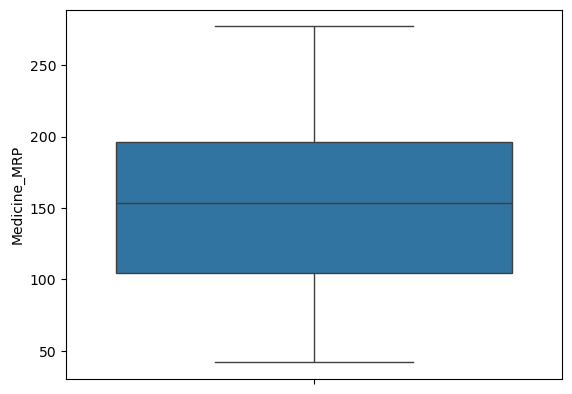

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(train_df['Medicine_MRP'])
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

train = pd.read_csv(r'E:/IITK/P3 Data/counterfeit_train.csv')
test = pd.read_csv(r'E:/IITK/P3 Data/counterfeit_test.csv')
sample = pd.read_csv(r'E:/IITK/P3 Data/sample_submission (1).csv')

# Combine for consistent preprocessing
test['Counterfeit_Sales'] = np.nan
combined = pd.concat([train, test])

# Label encode categoricals
cat_cols = combined.select_dtypes(include='object').columns
for col in cat_cols:
    combined[col] = LabelEncoder().fit_transform(combined[col].astype(str))

# Fill missing values
combined.fillna(combined.mean(), inplace=True)

# Split back
train = combined.iloc[:train.shape[0]]
test = combined.iloc[train.shape[0]:].drop('Counterfeit_Sales', axis=1)

X = train.drop('Counterfeit_Sales', axis=1)
y = train['Counterfeit_Sales']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict
test_preds = model.predict(test)

# Create submission
submission = pd.DataFrame({
    'Medicine_ID': test['Medicine_ID'],
    'Counterfeit_Sales': test_preds
})
submission.to_csv('E:/IITK/P3 Data/submission2.csv', index=False)
print("Final submission file created successfully.")


Final submission file created successfully.


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1️⃣ Load datasets
train_df = pd.read_csv(r'E:/IITK/P3 Data/counterfeit_train.csv')
test_df = pd.read_csv(r'E:/IITK/P3 Data/counterfeit_test.csv')

# 2️⃣ Separate features and target
X_train = train_df.drop(["Counterfeit_Sales", "Medicine_ID"], axis=1)
y_train = train_df["Counterfeit_Sales"]
X_test = test_df.drop("Medicine_ID", axis=1)

# 3️⃣ Encode categorical columns (if any)
cat_cols = X_train.select_dtypes(include="object").columns

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# 4️⃣ Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 5️⃣ Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7️⃣ Predict on test data
test_preds = model.predict(X_test_scaled)

# 8️⃣ Create submission
submission = pd.DataFrame({
    "Medicine_ID": test_df["Medicine_ID"],
    "Counterfeit_Sales": test_preds
})

# 9️⃣ Save submission
submission.to_csv(r'E:/IITK/P3 Data/submission3.csv', index=False)
print("✅ Final submission file 'submission3.csv' created successfully.")


✅ Final submission file 'submission3.csv' created successfully.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# 1️⃣ Load data
train_df = pd.read_csv("E:/IITK/P3 Data/counterfeit_train.csv")
test_df = pd.read_csv("E:/IITK/P3 Data/counterfeit_test.csv")

# 2️⃣ Separate features and target
X = train_df.drop(["Counterfeit_Sales", "Medicine_ID"], axis=1)
y = train_df["Counterfeit_Sales"]
X_test = test_df.drop("Medicine_ID", axis=1)

# 3️⃣ Encode categorical features
cat_cols = X.select_dtypes(include="object").columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# 4️⃣ Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 5️⃣ Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Model training
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 7️⃣ Validation predictions and MAE
val_preds = model.predict(X_val)
mae = mean_absolute_error(y_val, val_preds)
score = 1 - (mae / 1660)
print(f"Validation MAE: {mae:.2f}")
print(f"Estimated Score: {score:.4f}")

# 8️⃣ Train on full data
model.fit(X, y)

# 9️⃣ Predict on test data
test_preds = model.predict(X_test)

# 10️⃣ Create submission
submission = pd.DataFrame({
    "Medicine_ID": test_df["Medicine_ID"],
    "Counterfeit_Sales": test_preds
})

# 11️⃣ Save submission
submission.to_csv("E:/IITK/P3 Data/submission_project3_final.csv", index=False)
print("✅ Final submission file created successfully.")


Validation MAE: 756.40
Estimated Score: 0.5443
✅ Final submission file created successfully.
